In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
data = pd.read_csv('weather.csv', parse_dates=True, index_col=0)

In [29]:
data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes
2008-02-06,20.2,27.2,1.6,2.6,8.6,NaN,NaN,W,ENE,9.0,...,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,6.2,Yes
2008-02-07,18.6,26.3,6.2,5.2,5.2,NaN,NaN,W,S,15.0,...,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,27.6,Yes
2008-02-08,17.2,22.3,27.6,5.8,2.1,NaN,NaN,S,SE,7.0,...,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,12.6,Yes
2008-02-09,16.4,20.8,12.6,4.8,3.0,NaN,NaN,SSW,W,19.0,...,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,8.8,Yes


In [30]:
data.tail(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-16,11.9,17.3,0.0,1.6,0.2,WNW,26.0,W,WSW,19.0,...,69.0,1026.2,1023.5,7.0,7.0,13.3,17.2,No,0.0,No
2017-06-17,13.2,19.1,0.0,1.0,0.2,SSW,26.0,WNW,SSW,9.0,...,67.0,1024.3,1021.8,7.0,7.0,14.6,17.4,No,1.8,Yes
2017-06-18,11.3,18.0,1.8,2.0,6.3,S,52.0,SW,SSW,13.0,...,62.0,1025.7,1025.8,3.0,5.0,12.9,17.6,Yes,0.4,No
2017-06-19,11.2,18.3,0.4,2.2,1.9,SSW,37.0,W,S,17.0,...,69.0,1030.4,1028.4,6.0,7.0,12.7,17.2,No,4.4,Yes
2017-06-20,11.3,20.0,4.4,2.2,5.8,W,26.0,W,SSW,19.0,...,60.0,1028.7,1025.2,6.0,1.0,11.9,19.7,Yes,0.0,No
2017-06-21,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,22.0,...,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,0.0,No
2017-06-22,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,...,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,0.0,No
2017-06-23,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,15.0,...,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,0.0,No
2017-06-24,10.1,19.3,0.0,1.4,9.3,W,43.0,W,W,17.0,...,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,0.0,No


In [31]:
data.isna().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [32]:
dataset = data.drop(['WindGustDir', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)

In [44]:
dataset_clean = dataset.dropna()
len(dataset), len(dataset_clean)
dataset_clean

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,17.0,20.0,92.0,84.0,1017.6,1017.4,20.7,20.9,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,9.0,13.0,83.0,73.0,1017.9,1016.4,22.4,24.8,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,17.0,2.0,88.0,86.0,1016.7,1015.6,23.5,23.0,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,22.0,20.0,83.0,90.0,1014.2,1011.8,21.4,20.9,77.4,Yes
2008-02-06,20.2,27.2,1.6,2.6,8.6,9.0,22.0,69.0,62.0,1002.7,998.6,23.8,26.0,6.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,8.6,19.6,0.0,2.0,7.8,22.0,20.0,73.0,52.0,1025.9,1025.3,10.5,17.9,0.0,No
2017-06-22,9.3,19.2,0.0,2.0,9.2,20.0,7.0,78.0,53.0,1028.5,1024.6,11.0,18.7,0.0,No
2017-06-23,9.4,17.7,0.0,2.4,2.7,15.0,13.0,85.0,56.0,1020.8,1015.0,10.2,17.3,0.0,No


In [34]:
X = dataset_clean[dataset_clean.columns[:-1]]
Y = dataset_clean['RainTomorrow']
Y = np.array([0 if value == 'No' else 1 for value in Y])

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=42)

In [36]:
clf = Perceptron()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8055207026348808

In [37]:
sum(Y == 0)/len(Y)

0.7458424850957013

c:\Users\prant\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


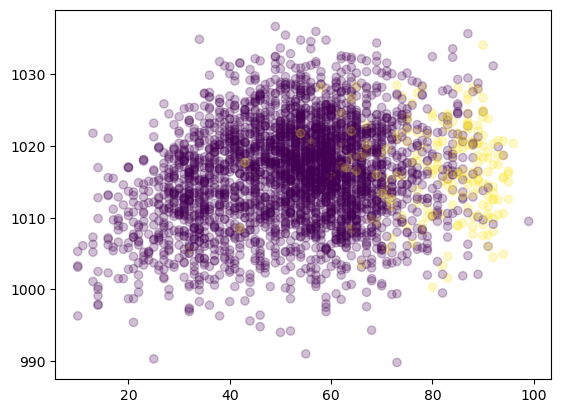

In [48]:
fig, ax = plt.subplots()
X_data = X.to_numpy()

y_all = clf.predict(X_data)
ax.scatter(x=X_data[:,8], y=X_data[:,10], c=y_all, alpha=.25)